In [1]:
import pandas as pd

In [2]:
#collecting data
legitimate_urls = pd.read_csv("legitimate-urls.csv")
phishing_urls = pd.read_csv("phishing-urls.csv")

In [3]:
legitimate_urls.head(10)
phishing_urls.head(10)

,Protocol,Domain,Path,Having_IP,URL_Length,Having_@_symbol,Redirection_//_symbol,Prefix_suffix_separation,Sub_domains,tiny_url,web_traffic,domain_registration_length,dns_record,statistical_report,age_domain,http_tokens,label
0,http,asesoresvelfit.com,/media/datacredito.co/,0,0,0,0,0,0,1,1,1,1,0,1,0,1
1,http,caixa.com.br.fgtsagendesaqueconta.com,/consulta8523211/principal.php,0,1,0,0,0,1,0,1,1,1,1,1,0,1
2,http,hissoulreason.com,/js/homepage/home/,0,0,0,0,0,0,0,1,1,1,1,1,0,1
3,http,unauthorizd.newebpage.com,/webapps/66fbf/,0,0,0,0,0,0,0,1,1,1,1,1,0,1
4,http,133.130.103.10,/23/,1,0,0,0,0,2,0,1,1,1,0,1,0,1
5,http,dj00.co.vu,/css/,0,2,1,0,0,0,0,0,1,1,1,1,0,1
6,http,133.130.103.10,/21/logar/,1,0,0,0,0,2,0,1,1,1,0,1,0,1
7,http,httpssicredi.esy.es,/servico/sicredi/validarclientes/mobi/index.php,0,2,0,0,0,2,0,1,1,1,1,1,1,1
8,http,gamesaty.ga,/wp-content///yh/en/,0,2,0,1,0,0,0,1,1,1,0,1,0,1
9,http,luxuryupgradepro.com,/ymailNew/ymailNew/,0,0,0,0,0,0,0,1,1,1,0,1,0,1


In [4]:
#data preprocessing
urls = legitimate_urls.append(phishing_urls)

In [5]:
urls.head(5)

,Protocol,Domain,Path,Having_IP,URL_Length,Having_@_symbol,Redirection_//_symbol,Prefix_suffix_separation,Sub_domains,tiny_url,web_traffic,domain_registration_length,dns_record,statistical_report,age_domain,http_tokens,label
0,http,www.liquidgeneration.com,/,0,0,0,0,0,0,0,1,1,1,0,1,0,0
1,http,www.onlineanime.org,/,0,0,0,0,0,0,0,1,1,1,1,1,0,0
2,http,www.ceres.dti.ne.jp,/~nekoi/senno/senfirst.html,0,0,0,0,0,1,0,0,1,1,0,1,0,0
3,http,www.galeon.com,/kmh/,0,0,0,0,0,0,0,0,1,1,0,1,0,0
4,http,www.fanworkrecs.com,/,0,0,0,0,0,0,0,1,1,1,0,1,0,0


In [6]:
urls.columns

Index(['Protocol', 'Domain', 'Path', 'Having_IP', 'URL_Length',
       'Having_@_symbol', 'Redirection_//_symbol', 'Prefix_suffix_separation',
       'Sub_domains', 'tiny_url', 'web_traffic', 'domain_registration_length',
       'dns_record', 'statistical_report', 'age_domain', 'http_tokens',
       'label'],
      dtype='object')

In [7]:
#removing unnecessary columns
urls = urls.drop(urls.columns[[0,1,2]],axis=1)

In [8]:
urls.tail(10)

,Having_IP,URL_Length,Having_@_symbol,Redirection_//_symbol,Prefix_suffix_separation,Sub_domains,tiny_url,web_traffic,domain_registration_length,dns_record,statistical_report,age_domain,http_tokens,label
988,0,1,0,0,1,2,0,1,1,1,1,1,0,1
989,0,1,0,0,0,0,1,1,1,1,0,1,0,1
990,0,1,0,0,1,2,0,1,1,1,1,1,0,1
991,0,1,0,0,0,0,0,1,1,1,0,1,0,1
992,0,1,0,0,0,0,0,1,1,1,1,1,0,1
993,0,1,0,0,0,1,0,1,1,1,0,1,0,1
994,0,1,0,0,0,1,0,1,1,1,0,1,0,1
995,0,0,0,0,0,0,0,1,1,1,0,1,0,1
996,0,2,0,0,1,0,0,1,1,1,1,1,0,1
997,0,2,0,0,1,2,0,1,1,1,1,1,0,1


In [9]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
urls = urls.sample(frac=1).reset_index(drop=True)

In [10]:
#removing class variable from dataset.
urls_without_labels = urls.drop('label',axis=1)
urls_without_labels.columns
labels = urls['label']

In [11]:
# splitting the data into train data and test data
# Dividing the data in the ratio of 70:30
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(urls_without_labels, labels, test_size=0.30, random_state=110)

In [12]:
print(len(data_train),len(data_test),len(labels_train),len(labels_test))

1410 605 1410 605


In [13]:
# Phishing - 1
# Legitimate - 0
#initially checking the split of labels_train data 
labels_train.value_counts()

0    718
1    692
Name: label, dtype: int64

In [28]:
# Creating the model and fitting the data into the model
# creating the model with default parameters
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators= 1000, random_state=100)

In [29]:
random_forest_classifier.fit(data_train,labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [16]:
#Predicting Result Data
prediction_label = random_forest_classifier.predict(data_test)

In [17]:
#accuracy  score
from sklearn.metrics import accuracy_score
accuracy_score(labels_test,prediction_label)


0.8231404958677686

In [34]:
#creating confusion matrx
from sklearn.metrics import confusion_matrix
# from matplotlib import pyplot as plt
# from support_functions import plot_confusion_matrix
confusionMatrix = confusion_matrix(labels_test,prediction_label)
print(confusionMatrix)
from sklearn.metrics import classification_report
print(classification_report(labels_test, prediction_label))

[[257  42]
 [ 65 241]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       299
           1       0.85      0.79      0.82       306

   micro avg       0.82      0.82      0.82       605
   macro avg       0.82      0.82      0.82       605
weighted avg       0.83      0.82      0.82       605



NameError: name 'plot_confusion_matrix' is not defined

<Figure size 2520x1080 with 0 Axes>

indices of columns : [10  1  7  5  4  6  0  2  3 12 11  9  8]

 ***Feature ranking: *** 

Feature name : Importance
1 statistical_report   :  0.25504817338330243 

2 URL_Length   :  0.25261387882177766 

3 web_traffic   :  0.23874019099848767 

4 Sub_domains   :  0.07555225617267675 

5 Prefix_suffix_separation   :  0.07296422160085858 

6 tiny_url   :  0.06497589133822361 

7 Having_IP   :  0.016439428225048163 

8 Having_@_symbol   :  0.010573702579785892 

9 Redirection_//_symbol   :  0.008949704764900871 

10 http_tokens   :  0.004142552114938531 

11 age_domain   :  0.0 

12 dns_record   :  0.0 

13 domain_registration_length   :  0.0 

**** The blue bars are the feature importances of the randomforest classifier, along with their inter-trees variability*****


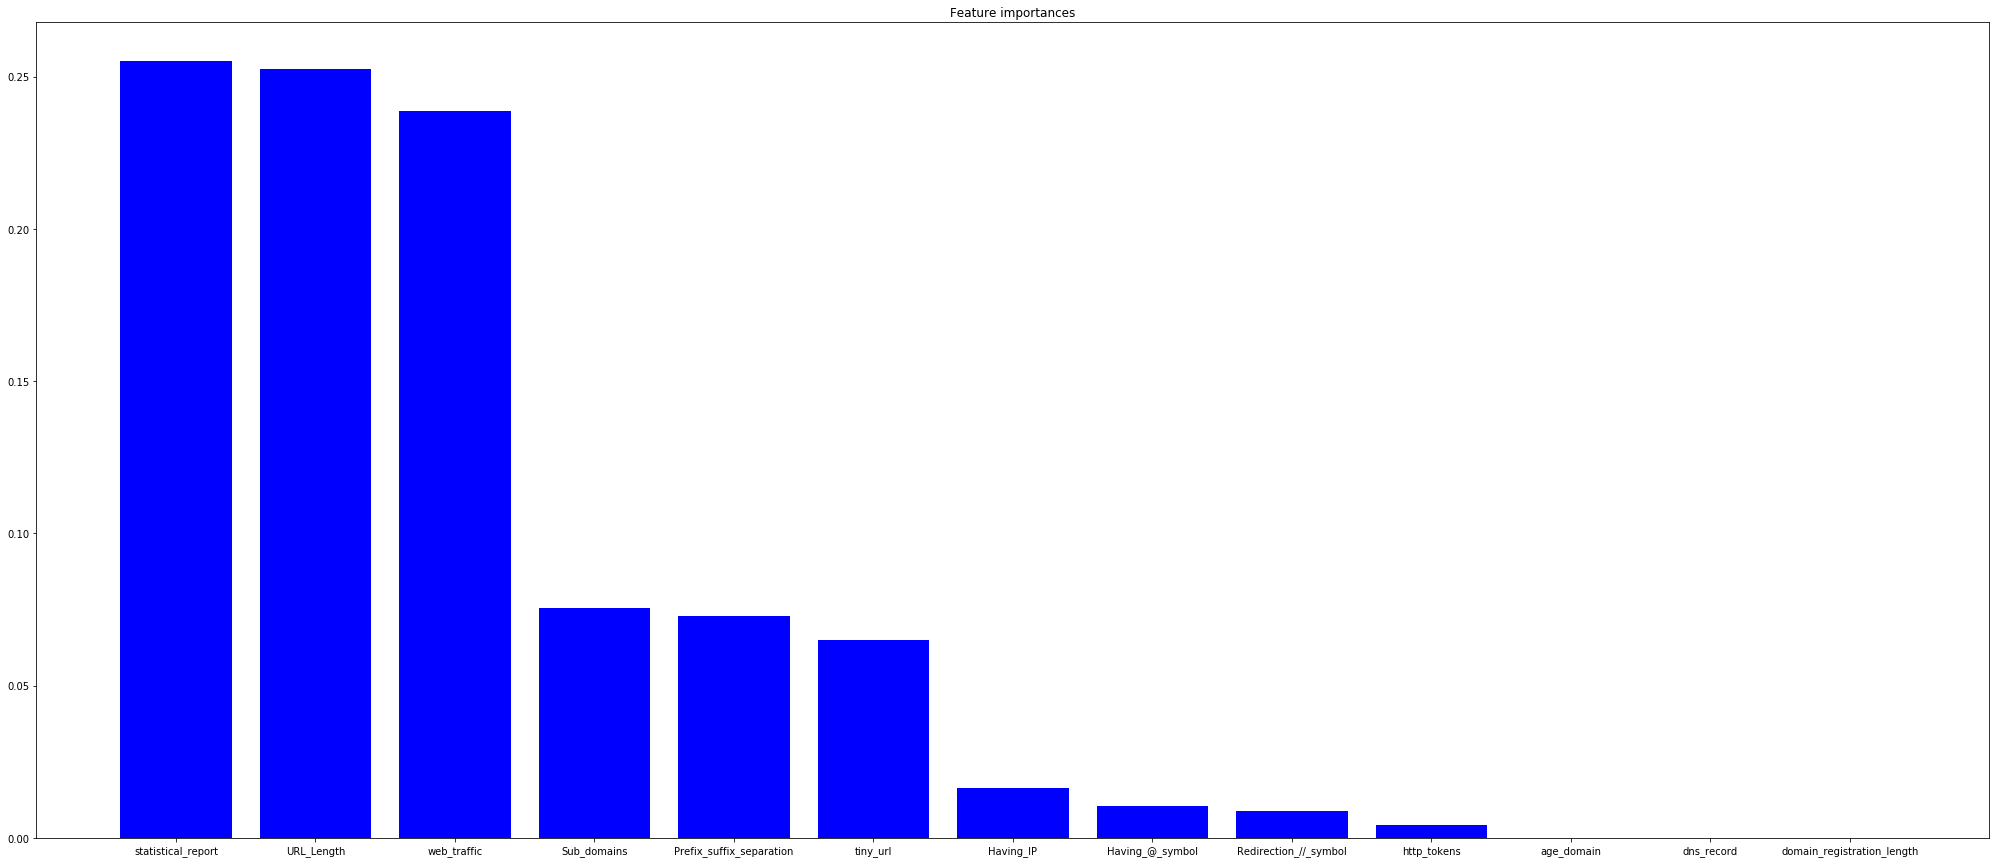

<Figure size 2520x1080 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
import numpy as np

#feature_importances_ : array of shape = [n_features] ------ The feature importances (the higher, the more important the feature).

#feature_importances_  -- This method returns the quantified relative importance in the order the features were fed to the algorithm

importances = random_forest_classifier.feature_importances_

#std = np.std([tree.feature_importances_ for tree in custom_random_forest_classifier.estimators_],axis=0)   #[[[estimators_ :explaination ---  list of DecisionTreeClassifier ----- (The collection of fitted sub-estimators.)]]]

#To make the plot pretty, we’ll instead sort the features from most to least important.
indices = np.argsort(importances)[::-1] 
print(f"indices of columns : {indices}")

# Print the feature ranking
print("\n ***Feature ranking: *** \n")
print("Feature name : Importance")

for f in range(data_train.shape[1]):
    print(f"{f+1} {data_train.columns[indices[f]]}   :  {importances[indices[f]]} \n")
    
print("**** The blue bars are the feature importances of the randomforest classifier, along with their inter-trees variability*****")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_train.shape[1]), importances[indices],
       color="b", align="center")   
#yerr=std[indices] -- this is another parameter that can be included if std is calculated above
#and also it gives error bar that's the reason we calculate std above. but here we are not making it plot.

plt.xticks(range(data_train.shape[1]), data_train.columns[indices])
plt.xlim([-1, data_train.shape[1]])

plt.rcParams['figure.figsize'] = (35,15)  #this will increase the size of the plot
plt.show()
plt.savefig('plot1.png')

In [24]:
# from sklearn import model_selection
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier

In [25]:
# kfold = model_selection.KFold(n_splits=10, random_state=7)
# # cart = DecisionTreeClassifier()
# num_trees = 100
# model = BaggingClassifier(base_estimator=custom_random_forest_classifier, n_estimators=num_trees, random_state=7)
# results = model_selection.cross_val_score(model, data_train, labels_train, cv=kfold)
# print(results.mean())